In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os

# 2: Load Data

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/self_made_ds')

Found 2477 files belonging to 3 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [ ]:
classes = data.class_names
classes

['OverRipe', 'Ripe', 'UnRipe']

# 3: Visualize Data

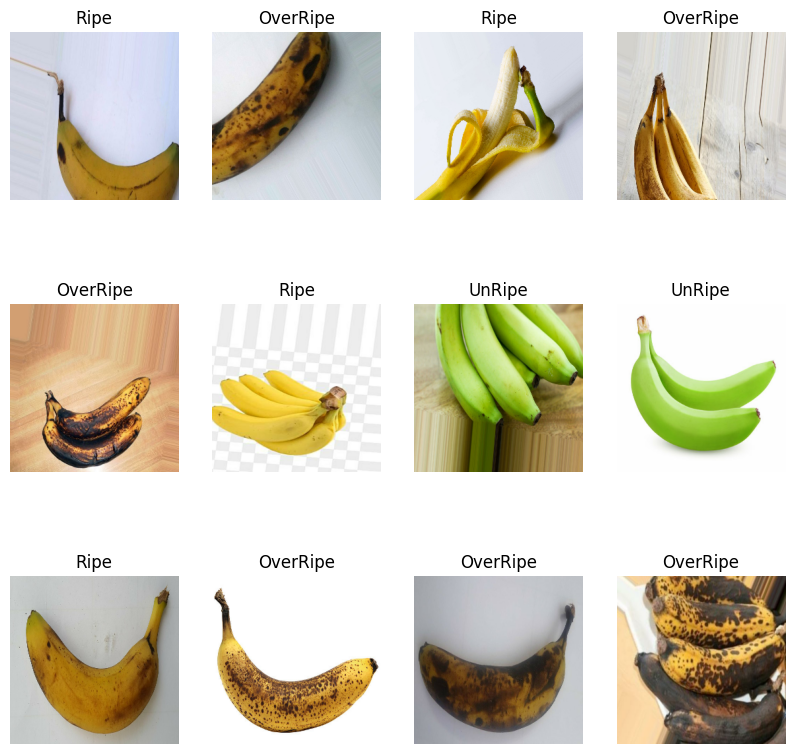

In [ ]:
plt.figure(figsize =(10,10))

for image_batch, label_batch in data.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.title(classes[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

# 4: Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.17984433, 0.17592277, 0.19945218],
          [0.14013043, 0.13620886, 0.15973827],
          [0.13832134, 0.13439977, 0.15792918],
          ...,
          [0.14620882, 0.14620882, 0.14620882],
          [0.07723006, 0.07723006, 0.07723006],
          [0.02104779, 0.01712622, 0.03673407]],
 
         [[0.19046523, 0.18654366, 0.21007307],
          [0.13054755, 0.12662598, 0.1501554 ],
          [0.13317363, 0.12925206, 0.15278147],
          ...,
          [0.09107091, 0.09107091, 0.09107091],
          [0.0247789 , 0.0247789 , 0.0247789 ],
          [0.02830446, 0.02438289, 0.04399073]],
 
         [[0.1820042 , 0.17808263, 0.20161204],
          [0.1489365 , 0.14501493, 0.16854434],
          [0.12905878, 0.12513721, 0.14866662],
          ...,
          [0.13053529, 0.13053529, 0.13053529],
          [0.03313192, 0.03313192, 0.03313192],
          [0.04199422, 0.03807265, 0.0576805 ]],
 
         ...,
 
         [[0.00392157, 0.00392157, 0.01176471],
          [0.01308

# 5: Split Data

In [ ]:
def get_dataset_partitions(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 57)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train, val, test = get_dataset_partitions(data)

In [ ]:
print(len(train), len(val), len(test))

62 7 9


# 6: Load DenseNet-121 Model

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the input image size
input_shape = (256, 256, 3)

# Load the DenseNet121 model (pre-trained on ImageNet)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


29084464/29084464 [==============================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 8, 8, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 7,300,675
Trainable params: 263,171
Non-trainable params: 7,037,504
_________________________________________________________________


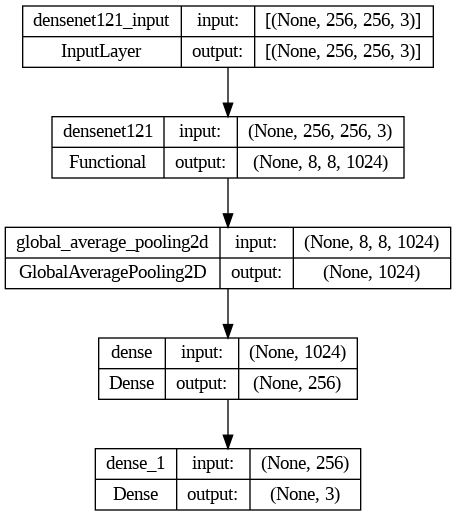

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file = 'model.png', show_shapes=True,show_layer_names=True)


In [ ]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
62/62 [==============================] - 739s 9s/step - loss: 0.1712 - accuracy: 0.9394 - val_loss: 0.0368 - val_accuracy: 0.9866
Epoch 2/20
62/62 [==============================] - 583s 9s/step - loss: 0.0381 - accuracy: 0.9837 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 3/20
62/62 [==============================] - 584s 9s/step - loss: 0.0225 - accuracy: 0.9944 - val_loss: 0.0136 - val_accuracy: 0.9955
Epoch 4/20
62/62 [==============================] - 578s 9s/step - loss: 0.0118 - accuracy: 0.9980 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 5/20
62/62 [==============================] - 576s 9s/step - loss: 0.0075 - accuracy: 0.9990 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 6/20
62/62 [==============================] - 569s 9s/step - loss: 0.0063 - accuracy: 0.9990 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 7/20
62/62 [==============================] - 560s 9s/step - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 8/20
62

In [ ]:
test_loss, test_accuracy = model.evaluate(test)
print("test loss:",test_loss)
print("test accuracy:",test_accuracy)

9/9 [==============================] - 81s 7s/step - loss: 3.2237e-04 - accuracy: 1.0000
test loss: 0.00032236624974757433
test accuracy: 1.0


In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# 7: Model Saving

In [ ]:
model.save('/content/drive/MyDrive/New_DenseNet121.h5')

# Load Model

In [1]:
from tensorflow import keras
pick_model = keras.models.load_model('/content/drive/MyDrive/New_DenseNet121.h5')

# 8: Plot Performance

In [2]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

NameError: ignored

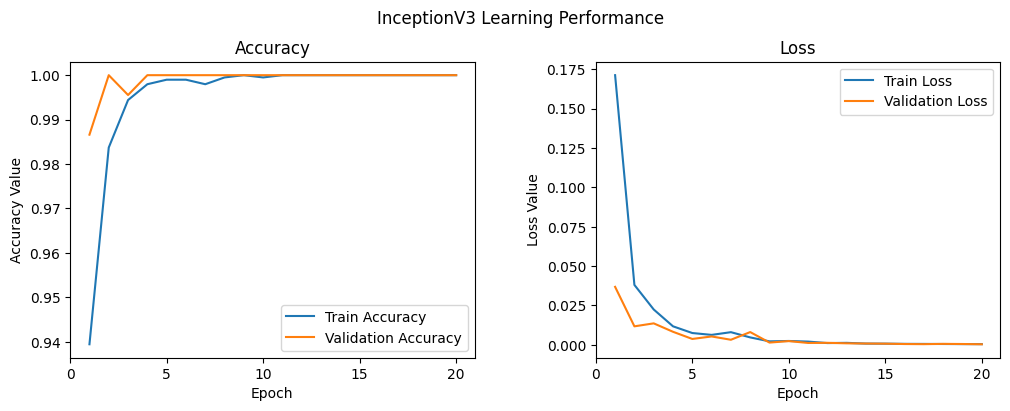

In [ ]:
# Plot Accuracy and Loss
import matplotlib.pyplot as plt
epochs = 20
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
t = f.suptitle('DenseNet121 Learning Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))
ax1.plot(epoch_list, acc, label='Train Accuracy')
ax1.plot(epoch_list, val_acc, label='Validation Accuracy')
ax1.set_xticks(np.arange(0,epochs+1,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc='best')

ax2.plot(epoch_list, loss, label='Train Loss')
ax2.plot(epoch_list, val_loss, label='Validation Loss')
ax2.set_xticks(np.arange(0,epochs+1,5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc='best')

# 9: Evaluate

In [ ]:
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall

In [ ]:
categorical_acc = CategoricalAccuracy()
precision = Precision()
recall = Recall()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    y_categorical = np.eye(3)[y]  # Convert categorical labels to one-hot encoded format
    categorical_acc.update_state(y_categorical, yhat)
    precision.update_state(y_categorical, yhat)
    recall.update_state(y_categorical, yhat)

accuracy = categorical_acc.result()
precision_result = precision.result()
recall_result = recall.result()



1/1 [==============================] - 9s 9s/step


In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision_result)
print("Recall:", recall_result)


Accuracy: tf.Tensor(1.0, shape=(), dtype=float32)
Precision: tf.Tensor(1.0, shape=(), dtype=float32)
Recall: tf.Tensor(1.0, shape=(), dtype=float32)


# 10: Classification Report and Confusion Matrix

In [ ]:
y_pred_classes = []
y_true_classes = []

for batch in test:
    X, y = batch
    y_pred = model.predict(X)
    y_pred_classes.extend(np.argmax(y_pred, axis=1))
    y_true_classes.extend(y)

y_pred_classes = np.array(y_pred_classes)
y_true_classes = np.array(y_true_classes)

print("y_pred_classes shape:", y_pred_classes.shape)
print("y_true_classes shape:", y_true_classes.shape)

1/1 [==============================] - 9s 9s/step
y_pred_classes shape: (288,)
y_true_classes shape: (288,)


In [ ]:
from sklearn.metrics import f1_score
f1 = f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print("F1 Score:", f1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Classification Report:
              precision    recall  f1-score   support

        ripe       1.00      1.00      1.00        97
      unripe       1.00      1.00      1.00        98
    overripe       1.00      1.00      1.00        93

    accuracy                           1.00       288
   macro avg       1.00      1.00      1.00       288
weighted avg       1.00      1.00      1.00       288



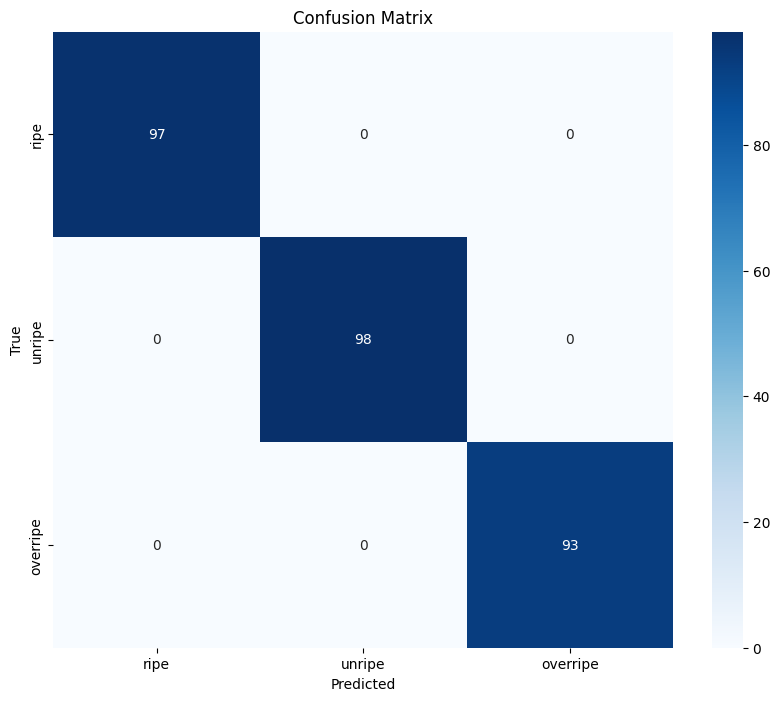

In [ ]:
# Compute the classification report
class_names = ['ripe', 'unripe', 'overripe']
classification_rep = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(classification_rep)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 11: Test

In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/download.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

In [ ]:
class_indices = {0: 'Overripe', 1: 'Ripe', 2: 'Unripe'}
predicted_class_index = np.argmax(yhat)
predicted_class = class_indices[predicted_class_index]
print("Predicted class:", predicted_class)

# 12:  Plot Images with Predictions

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # create a batch
    
    predictions = model.predict(img_array)
    
    predicted_label = classes[np.argmax(predictions[0])]
    confidence = round(100 *(np.max(predictions[0])), 2)
    return predicted_label, confidence

In [ ]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.7, wspace=0.7)
for images, labels in test.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy())
        
        pred_label, confidence = predict(pick_model, images[i])
        actual_label = classes[labels[i]]
        
        plt.title(f"Actual: {actual_label},\n Predicted: {pred_label}, \n Confidence: {confidence}")
        
        plt.axis('off')